<a href="https://colab.research.google.com/github/troberts60/LRRK2_Drug_Study/blob/main/LRRK2_Fingerprint_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PaDEL-Descriptor

In [1]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2021-12-09 23:14:46--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2021-12-09 23:14:46--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M   108MB/s    in 0.2s    

2021-12-09 23:14:47 (108 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2021-12-09 23:14:47--  https://github

In [2]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

##Bioactivity Data

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('lrrk2_ml_data.csv')

In [5]:
df

,molecule_chembl_id,canonical_smiles,class,MW,LogP,hDon,hAcc,pIC50
0,CHEMBL1771409,Cc1cc(N/N=C/c2ccc(O)c(O)c2)nc2ccccc12,inactive,293.326,3.40042,3,5,4.879426
1,CHEMBL1771411,Cc1cc(N/N=C/c2ccncc2)nc2ccccc12,inactive,262.316,3.38422,1,4,5.387216
2,CHEMBL1933288,C[C@@H]1CCNC(=O)c2cc3ccc(C(=O)Nc4nc5ccccc5n4CC...,active,458.566,3.88950,2,6,7.795880
3,CHEMBL2012582,COc1cc(C(=O)N2CCC(N3CCN(C)CC3)CC2)ccc1Nc1ncc2c...,active,570.698,3.43870,1,9,7.886057
4,CHEMBL509032,COc1cc(N2CCC(N3CCN(C)CC3)CC2)ccc1Nc1ncc(Cl)c(N...,active,614.216,5.02410,2,10,8.107905
...,...,...,...,...,...,...,...,...
1199,CHEMBL4641263,COc1cc(NS(C)(=O)=O)ccc1Nc1ncc2c(n1)N(C)c1ccccc...,inactive,522.509,3.89070,2,8,5.050903
1200,CHEMBL4635720,COc1cc(NS(C)(=O)=O)ccc1Nc1ncc2c(n1)N(C)c1ccccc...,inactive,482.566,3.73680,2,8,6.165579
1201,CHEMBL4645565,CC(O)(C#Cc1ccc(N2CCOCC2)c(Nc2ncnc3[nH]ccc23)c1...,active,446.536,3.25380,3,8,7.024109
1202,CHEMBL4560589,C[C@H]1CN(c2cc(-c3nn(C)c4ccc(OC5(C)CC5)cc34)nc...,inactive,393.491,3.57520,0,7,5.188425


In [6]:
select = ['canonical_smiles','molecule_chembl_id']
df_p = df[select]
df_p

,canonical_smiles,molecule_chembl_id
0,Cc1cc(N/N=C/c2ccc(O)c(O)c2)nc2ccccc12,CHEMBL1771409
1,Cc1cc(N/N=C/c2ccncc2)nc2ccccc12,CHEMBL1771411
2,C[C@@H]1CCNC(=O)c2cc3ccc(C(=O)Nc4nc5ccccc5n4CC...,CHEMBL1933288
3,COc1cc(C(=O)N2CCC(N3CCN(C)CC3)CC2)ccc1Nc1ncc2c...,CHEMBL2012582
4,COc1cc(N2CCC(N3CCN(C)CC3)CC2)ccc1Nc1ncc(Cl)c(N...,CHEMBL509032
...,...,...
1199,COc1cc(NS(C)(=O)=O)ccc1Nc1ncc2c(n1)N(C)c1ccccc...,CHEMBL4641263
1200,COc1cc(NS(C)(=O)=O)ccc1Nc1ncc2c(n1)N(C)c1ccccc...,CHEMBL4635720
1201,CC(O)(C#Cc1ccc(N2CCOCC2)c(Nc2ncnc3[nH]ccc23)c1...,CHEMBL4645565
1202,C[C@H]1CN(c2cc(-c3nn(C)c4ccc(OC5(C)CC5)cc34)nc...,CHEMBL4560589


In [7]:
df_p.to_csv('mol.smi', sep='\t', index=False, header=False)

In [8]:
! cat mol.smi | wc -l

1204


## Calculate fingerprints

In [9]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [10]:
! bash padel.sh

Processing CHEMBL1771409 in mol.smi (1/1204). 
Processing CHEMBL1771411 in mol.smi (2/1204). 
Processing CHEMBL1933288 in mol.smi (3/1204). Average speed: 4.52 s/mol.
Processing CHEMBL2012582 in mol.smi (4/1204). Average speed: 2.41 s/mol.
Processing CHEMBL509032 in mol.smi (5/1204). Average speed: 2.08 s/mol.
Processing CHEMBL2170016 in mol.smi (6/1204). Average speed: 1.68 s/mol.
Processing CHEMBL2178141 in mol.smi (7/1204). Average speed: 1.49 s/mol.
Processing CHEMBL2178139 in mol.smi (9/1204). Average speed: 1.21 s/mol.
Processing CHEMBL2178140 in mol.smi (8/1204). Average speed: 1.37 s/mol.
Processing CHEMBL2178138 in mol.smi (10/1204). Average speed: 1.13 s/mol.
Processing CHEMBL2178137 in mol.smi (11/1204). Average speed: 1.02 s/mol.
Processing CHEMBL2178135 in mol.smi (13/1204). Average speed: 0.97 s/mol.
Processing CHEMBL2178136 in mol.smi (12/1204). Average speed: 0.96 s/mol.
Processing CHEMBL2178134 in mol.smi (14/1204). Average speed: 0.84 s/mol.
Processing CHEMBL2178133 i

##Set up X and Y Data

In [11]:
df_X = pd.read_csv('descriptors_output.csv')

In [12]:
df_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL1771411,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,CHEMBL1771409,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CHEMBL1933288,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,CHEMBL2012582,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,CHEMBL2170016,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199,CHEMBL4641263,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1200,CHEMBL4635720,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1201,CHEMBL4645565,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1202,CHEMBL4560589,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
df_X = df_X.drop(columns=['Name'])

In [14]:
df_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1200,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1201,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1202,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
df_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1200,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1201,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1202,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
df_Y = df['pIC50']
df_Y

0       4.879426
1       5.387216
2       7.795880
3       7.886057
4       8.107905
          ...   
1199    5.050903
1200    6.165579
1201    7.024109
1202    5.188425
1203    6.000000
Name: pIC50, Length: 1204, dtype: float64

In [17]:
df_final = pd.concat([df_X,df_Y], axis=1)

In [18]:
df_final

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.879426
1,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.387216
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.795880
3,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.886057
4,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.107905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.050903
1200,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.165579
1201,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.024109
1202,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.188425


In [18]:
df_final.to_csv('lrrk2_finished_ml_data.csv', index=False)

#Random Forest Model

In [19]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [81]:
df_X

,PubchemFP2,PubchemFP12,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP23,PubchemFP24,PubchemFP33,PubchemFP143,PubchemFP145,PubchemFP146,PubchemFP150,PubchemFP152,PubchemFP153,PubchemFP179,PubchemFP186,PubchemFP187,PubchemFP188,PubchemFP192,PubchemFP199,PubchemFP258,PubchemFP259,PubchemFP260,PubchemFP261,PubchemFP286,PubchemFP287,PubchemFP293,PubchemFP300,PubchemFP338,PubchemFP339,PubchemFP340,PubchemFP341,PubchemFP346,PubchemFP352,PubchemFP353,PubchemFP357,PubchemFP359,PubchemFP363,PubchemFP364,PubchemFP366,...,PubchemFP638,PubchemFP641,PubchemFP643,PubchemFP644,PubchemFP645,PubchemFP646,PubchemFP651,PubchemFP654,PubchemFP655,PubchemFP659,PubchemFP666,PubchemFP671,PubchemFP672,PubchemFP674,PubchemFP676,PubchemFP680,PubchemFP682,PubchemFP684,PubchemFP688,PubchemFP689,PubchemFP691,PubchemFP692,PubchemFP696,PubchemFP697,PubchemFP698,PubchemFP699,PubchemFP702,PubchemFP703,PubchemFP704,PubchemFP712,PubchemFP716,PubchemFP721,PubchemFP734,PubchemFP735,PubchemFP758,PubchemFP779,PubchemFP784,PubchemFP797,PubchemFP798,PubchemFP821
0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,...,0,1,1,1,0,0,1,1,1,0,0,0,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,1
2,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,...,0,0,1,0,1,1,0,1,0,0,0,1,1,1,0,0,0,1,1,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
3,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,1,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,1,...,0,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,0,1,1
4,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,...,0,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,1,1,0,0,0,1,1,0,1,0,0,0,1,0,1,...,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1
1200,1,1,1,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0,0,1,...,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1
1201,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,0,1,0,0,0,1,1,1,1,1,0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1202,1,1,1,1,1,0,0,0,1,1,1,0,0,0,1,0,1,1,1,0,1,1,0,0,1,0,0,1,0,1,1,1,1,1,0,1,0,0,0,1,...,0,1,0,1,0,0,1,1,1,1,1,0,0,1,0,1,1,0,1,1,1,0,1,0,1,1,1,1,0,0,0,1,0,1,1,0,1,0,1,1


In [82]:
df_Y.shape

(1204,)

##Remove Low Variance

In [83]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

df_X = remove_low_variance(df_X, threshold=0.1)
df_X


,PubchemFP2,PubchemFP12,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP23,PubchemFP24,PubchemFP33,PubchemFP143,PubchemFP145,PubchemFP146,PubchemFP150,PubchemFP152,PubchemFP153,PubchemFP179,PubchemFP186,PubchemFP187,PubchemFP188,PubchemFP192,PubchemFP199,PubchemFP258,PubchemFP259,PubchemFP260,PubchemFP261,PubchemFP286,PubchemFP287,PubchemFP293,PubchemFP300,PubchemFP338,PubchemFP339,PubchemFP340,PubchemFP341,PubchemFP346,PubchemFP352,PubchemFP353,PubchemFP357,PubchemFP359,PubchemFP363,PubchemFP364,PubchemFP366,...,PubchemFP638,PubchemFP641,PubchemFP643,PubchemFP644,PubchemFP645,PubchemFP646,PubchemFP651,PubchemFP654,PubchemFP655,PubchemFP659,PubchemFP666,PubchemFP671,PubchemFP672,PubchemFP674,PubchemFP676,PubchemFP680,PubchemFP682,PubchemFP684,PubchemFP688,PubchemFP689,PubchemFP691,PubchemFP692,PubchemFP696,PubchemFP697,PubchemFP698,PubchemFP699,PubchemFP702,PubchemFP703,PubchemFP704,PubchemFP712,PubchemFP716,PubchemFP721,PubchemFP734,PubchemFP735,PubchemFP758,PubchemFP779,PubchemFP784,PubchemFP797,PubchemFP798,PubchemFP821
0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,...,0,1,1,1,0,0,1,1,1,0,0,0,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,1
2,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,...,0,0,1,0,1,1,0,1,0,0,0,1,1,1,0,0,0,1,1,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
3,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,1,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,1,...,0,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,0,1,1
4,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,...,0,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,1,1,0,0,0,1,1,0,1,0,0,0,1,0,1,...,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1
1200,1,1,1,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0,0,1,...,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1
1201,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,0,1,0,0,0,1,1,1,1,1,0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1202,1,1,1,1,1,0,0,0,1,1,1,0,0,0,1,0,1,1,1,0,1,1,0,0,1,0,0,1,0,1,1,1,1,1,0,1,0,0,0,1,...,0,1,0,1,0,0,1,1,1,1,1,0,0,1,0,1,1,0,1,1,1,0,1,0,1,1,1,1,0,0,0,1,0,1,1,0,1,0,1,1


In [84]:
df_X.to_csv('desc_list.csv', index=False)

##80:20 Split

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(df_X, df_Y, test_size=0.2)

In [86]:
X_train.shape, Y_train.shape

((963, 184), (963,))

##Build Random Forest Model

In [87]:
import numpy as np

In [88]:
np.random.seed(100)
m1 = RandomForestRegressor(n_estimators=100)
m1.fit(X_train, Y_train)
r2 = m1.score(X_test, Y_test)
r2

0.5008608020270104

In [89]:
Y_pred = m1.predict(X_test)

##Experimental vs. Predicted

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

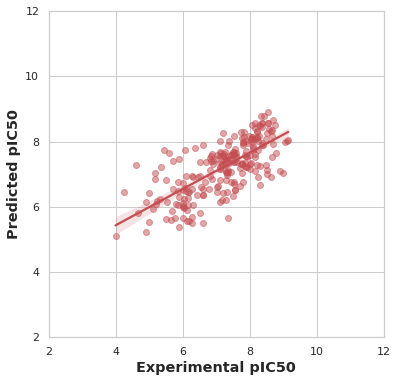

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("whitegrid")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.5}, color="r")
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(2, 12)
ax.set_ylim(2, 12)
ax.figure.set_size_inches(6, 6)
plt.show

#Input Data

In [75]:
!rm mol.smi

In [76]:
!rm descriptors_output.csv

In [77]:
x_file = input("Enter file name: ")
X = pd.read_csv(x_file)
chem_id = X['molecule_chembl_id']
X.to_csv('mol.smi', sep='\t', index=False, header=False)
! bash padel.sh
X = pd.read_csv('descriptors_output.csv')
Xl = list(pd.read_csv('desc_list.csv').columns)
X = X[Xl]

Enter file name: test2.csv
Processing CHEMBL1132 in mol.smi (1/14). 
Processing CHEMBL1132 in mol.smi (2/14). 
Processing CHEMBL25619 in mol.smi (3/14). Average speed: 1.52 s/mol.
Processing CHEMBL149667 in mol.smi (5/14). Average speed: 0.63 s/mol.
Processing CHEMBL25619 in mol.smi (4/14). Average speed: 0.77 s/mol.
Processing CHEMBL149667 in mol.smi (6/14). Average speed: 0.48 s/mol.
Processing CHEMBL148848 in mol.smi (7/14). Average speed: 0.46 s/mol.
Processing CHEMBL148848 in mol.smi (8/14). Average speed: 0.39 s/mol.
Processing CHEMBL423579 in mol.smi (9/14). Average speed: 0.39 s/mol.
Processing CHEMBL423579 in mol.smi (10/14). Average speed: 0.34 s/mol.
Processing CHEMBL3 in mol.smi (12/14). Average speed: 0.32 s/mol.
Processing CHEMBL3 in mol.smi (11/14). Average speed: 0.35 s/mol.
Processing CHEMBL681 in mol.smi (13/14). Average speed: 0.31 s/mol.
Processing CHEMBL23497 in mol.smi (14/14). Average speed: 0.29 s/mol.
Descriptor calculation completed in 4.31 secs . Average spee

In [78]:
Y_pred = m1.predict(X)
bio_act = []
for i in Y_pred:
  if (i >= 7):
    bio_act.append('active')
  elif (i <= 6.52):
    bio_act.append('inactive')
  else:
    bio_act.append('intermediate')

In [79]:
pIC50 = pd.Series(Y_pred, name='pIC50')
mol_name = pd.Series(chem_id, name='molecule name')
activity = pd.Series(bio_act, name='bio-activity')
final_df = pd.concat([mol_name, pIC50, activity], axis=1)
final_df

,molecule name,pIC50,bio-activity
0,CHEMBL1132,6.024872,inactive
1,CHEMBL1132,6.024872,inactive
2,CHEMBL25619,5.984861,inactive
3,CHEMBL25619,5.984861,inactive
4,CHEMBL149667,6.091000,inactive
5,CHEMBL149667,6.091000,inactive
6,CHEMBL148848,6.062333,inactive
7,CHEMBL148848,6.062333,inactive
8,CHEMBL423579,6.305810,inactive
9,CHEMBL423579,6.305810,inactive


In [80]:
final_df.to_csv('final_predictions.csv',index=False)